# Conversion Report

step through each example

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import os
import sys

try:
    import jose
except ModuleNotFoundError:
    print('jose not in PYTHONPATH, needs to be added')
    print('Attempting to add temporarily to demonstrate example functionality')
    sys.path.insert(1, os.path.join(os.getcwd(), 'PyJose'))
    import jose
    
from astropy.io import fits as pyfits

imageDir = os.path.join(os.getcwd(), 'PyJose', 'images')
dataDir = os.path.join(os.getcwd(), 'PyJose', 'data')
example1Dir = os.path.join(dataDir, 'example1')

jose not in PYTHONPATH, needs to be added
Attempting to add temporarily to demonstrate example functionality


In [2]:
# set up example 1
frame1 = pyfits.open(os.path.join(imageDir, 'ex1.fits'))[0]
Q = frame1.header.get('EPADU')
rn = frame1.header.get('RDNOISE') / Q
leftBound = 240
rightBound = 270
variance_image = np.abs(frame1.data) / Q + rn**2

### Polynomial Fitting

In [3]:
loadData = lambda filename: np.loadtxt('PyJose/data/procvect/' + filename + '.csv', delimiter=',')
idl_fittedData = loadData('bgRow')
data = loadData('datav')

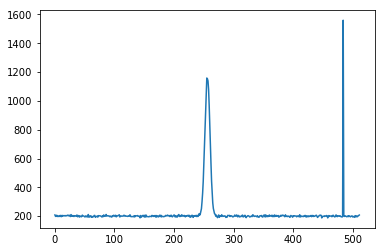

In [4]:
plt.plot(data)

### Background Fitting Comparison

In [5]:
background = jose.fit_background(frame1.data, (leftBound, rightBound), variance_image)

ValueError: operands could not be broadcast together with shapes (482,) (482,2) 

In [ ]:
idl_background = np.loadtxt(os.path.join('PyJose/data/example1', 'bgim.csv'), delimiter=',')
difference_background = background - idl_background

In [ ]:
f, ax = plt.subplots(1,4, figsize=(18,4))

f.suptitle("Background Fitting", size='xx-large')

ax[0].imshow(frame1.data, norm=LogNorm())
ax[0].set_title('Original Data')
ax[1].imshow(background)
ax[1].set_title('Python')
ax[2].imshow(idl_background)
ax[2].set_title('IDL')
ax[3].imshow(difference_background)
ax[3].set_title('Differences')

In [ ]:
difference_background

In [ ]:
np.max(difference_background)

In [ ]:
np.min(difference_background)